In [ ]:
#@Author: Gemma Gordon
#@Date: November 2022
# Script to compare the CDR sequences found in the Abs and sdAbs sequence datasets

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import logomaker as lm
import ast
import os 

load in csvs

Gives columns for CDR sequences in dict with position and amino acid at that position (ANARCI-predicted)

In [2]:
abs_seqs = pd.read_csv('vh_seq_summary_eliyahu.csv')
sdabs_seqs = pd.read_csv('vhh_seq_summary_li.csv')

In [3]:
abs_seqs.head()

,Unnamed: 0,index,cdrh1,cdrh2,cdrh3,v_gene,cdrh1_lens,cdrh2_lens,cdrh3_lens
0,0,0,"{'27 ': 'G', '28 ': 'X', '29 ': 'I', '30 ': 'F...","{'56 ': 'I', '57 ': 'W', '58 ': 'S', '59 ': 'D...","{'105 ': 'A', '106 ': 'R', '107 ': 'A', '108 '...",IGHV3-33*01,8,8,19
1,1,1,"{'27 ': 'G', '28 ': 'Y', '29 ': 'T', '30 ': 'F...","{'56 ': 'I', '57 ': 'N', '58 ': 'T', '59 ': 'N...","{'105 ': 'A', '106 ': 'R', '107 ': 'G', '108 '...",IGHV7-4-1*02,8,8,20
2,2,2,"{'27 ': 'G', '28 ': 'Y', '29 ': 'S', '30 ': 'F...","{'56 ': 'I', '57 ': 'X', '58 ': 'P', '59 ': 'A...","{'105 ': 'A', '106 ': 'R', '107 ': 'A', '108 '...",IGHV5-51*01,8,8,11
3,3,3,"{'27 ': 'G', '28 ': 'G', '29 ': 'X', '30 ': 'F...","{'56 ': 'I', '57 ': 'I', '58 ': 'P', '59 ': 'I...","{'105 ': 'A', '106 ': 'R', '107 ': 'P', '108 '...",IGHV1-69*01,8,8,17
4,4,4,"{'27 ': 'X', '28 ': 'D', '29 ': 'T', '30 ': 'X...","{'56 ': 'I', '57 ': 'I', '58 ': 'P', '59 ': 'I...","{'105 ': 'A', '106 ': 'R', '107 ': 'V', '108 '...",IGHV1-69*01,8,8,16


Extract only IGHV3 results from Abs results

In [5]:
abs_seqs_v3 = abs_seqs.loc[abs_seqs['v_gene'].str.contains('IGHV3')]

In [6]:
len(abs_seqs_v3)

763740

Split datasets by loop

In [7]:
abs_h1 = abs_seqs_v3[['cdrh1', 'cdrh1_lens']]
abs_h2 = abs_seqs_v3[['cdrh2', 'cdrh2_lens']]
abs_h3 = abs_seqs_v3[['cdrh3', 'cdrh3_lens']]

In [45]:
# get average lengths of loops
print('Abs H1 average length: ' + str(np.mean(abs_h1['cdrh1_lens'])))
print('Abs H2 average length: ' + str(np.mean(abs_h2['cdrh2_lens'])))
print('Abs H3 average length: ' + str(np.mean(abs_h3['cdrh3_lens'])))

Abs H1 average length: 7.580824626181685
Abs H2 average length: 8.104678293660147
Abs H3 average length: 14.682124806871448


In [8]:
sdabs_h1 = sdabs_seqs[['cdrh1', 'cdrh1_lens']]
sdabs_h2 = sdabs_seqs[['cdrh2', 'cdrh2_lens']]
sdabs_h3 = sdabs_seqs[['cdrh3', 'cdrh3_lens']]

In [46]:
print('sdAbs H1 average length: ' + str(np.mean(sdabs_h1['cdrh1_lens'])))
print('sdAbs H2 average length: ' + str(np.mean(sdabs_h2['cdrh2_lens'])))
print('sdAbs H3 average length: ' + str(np.mean(sdabs_h3['cdrh3_lens'])))

sdAbs H1 average length: 7.9627880492196725
sdAbs H2 average length: 7.6430699609649135
sdAbs H3 average length: 16.633276225059877


In [64]:
print('All H1 average length: ' + str(np.mean(list(sdabs_h1['cdrh1_lens']) + list(abs_h1['cdrh1_lens']))))
print('All H2 average length: ' + str(np.mean(list(sdabs_h2['cdrh2_lens']) + list(abs_h2['cdrh2_lens']))))
print('All H3 average length: ' + str(np.mean(list(sdabs_h3['cdrh3_lens']) + list(abs_h3['cdrh3_lens']))))

All H1 average length: 7.839458504694391
All H2 average length: 7.7921155029898
All H3 average length: 16.003282353418655


### Actual overlaps

In [9]:
def get_len_clusters(df, len_col, seq_col):

    # cluster loop sequences into groups of matching lengths'''
    len_clusters = dict()
    for length in set(df[len_col]):
        len_clusters[length] = df[seq_col].loc[df[len_col] == length] # extract all seqs of certain length to their own cluster 

    return len_clusters

In [10]:
abs_h1_clusters = get_len_clusters(abs_h1, 'cdrh1_lens', 'cdrh1')

In [11]:
sdabs_h1_clusters = get_len_clusters(sdabs_h1, 'cdrh1_lens', 'cdrh1')

In [12]:
abs_h2_clusters = get_len_clusters(abs_h2, 'cdrh2_lens', 'cdrh2')
sdabs_h2_clusters = get_len_clusters(sdabs_h2, 'cdrh2_lens', 'cdrh2')

In [13]:
abs_h3_clusters = get_len_clusters(abs_h3, 'cdrh3_lens', 'cdrh3')
sdabs_h3_clusters = get_len_clusters(sdabs_h3, 'cdrh3_lens', 'cdrh3')

In [37]:
def find_overlaps(abs_clusters, sdabs_clusters, loop):

    # find set of lengths that both ab types have sequences of that length
    lengths = list(set(abs_clusters.keys()) & set(sdabs_clusters))

    count_overlaps = dict()
    overlap_seqs_dict = dict() # store matching sequences
    abs_unique_seq_counter = 0
    sdabs_unique_seq_counter = 0

    for l in lengths: # for each length, make pairwise comparison between sequences in both abs and sdabs sets
        abs_seqs = abs_clusters[l]
        sdabs_seqs = sdabs_clusters[l]
        overlap_seqs = list(set(abs_seqs) & set(sdabs_seqs))
        overlap_seqs_dict[l] = overlap_seqs
        count_overlaps[l] = len(overlap_seqs)

        # keep track of how many unique seqs within ab type there are (redundancy in dataset)
        abs_unique_seq_counter += len(set(abs_seqs))
        sdabs_unique_seq_counter += len(set(sdabs_seqs))

    names = list(count_overlaps.keys())
    values = list(count_overlaps.values())

    plt.figure(figsize=(10,5))
    plt.bar(range(len(count_overlaps)), values, tick_label=names)
    plt.xlabel('Sequence length')
    plt.ylabel('Number of identical sequences')
    plt.title(loop)
    plt.show()

    print(count_overlaps)
    print(str(sum(count_overlaps.values())) + ' sequences match out of ' + str(abs_unique_seq_counter) + ' and ' + str(sdabs_unique_seq_counter) + ' unique Abs and sdAbs sequences')
    
    return count_overlaps, overlap_seqs_dict

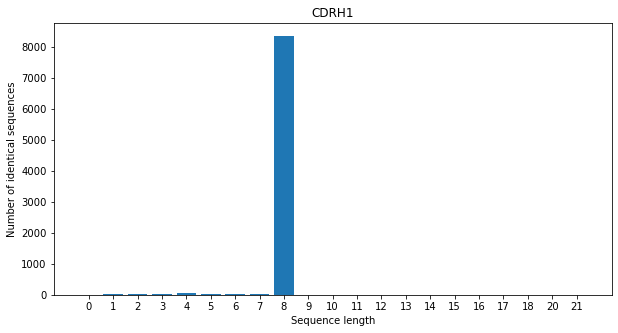

{0: 1, 1: 12, 2: 29, 3: 18, 4: 67, 5: 24, 6: 12, 7: 17, 8: 8359, 9: 8, 10: 3, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 20: 0, 21: 0}
8550 sequences match out of 123491 and 237743 unique Abs and sdAbs sequences


In [38]:
h1_overlap_seqs, h1_overlap_seqs_dict = find_overlaps(abs_h1_clusters, sdabs_h1_clusters, 'CDRH1')

Check overlapping sequences are actually the same - most for H1 of length 8

In [39]:
check_seq = h1_overlap_seqs_dict[8][0] # just pull out one sequence of length 8 

# check if in both abs_seqs and sdabs_seqs
print('check abs')
for seq in abs_h1_clusters[8]:
    if seq == check_seq:
        print(seq)
        print(check_seq)
        print('found')

print('check sdabs')
for seq in sdabs_h1_clusters[8]:
    if seq == check_seq:
        print(seq)
        print(check_seq)
        print('found')

check abs
{'27 ': 'G', '28 ': 'F', '29 ': 'S', '30 ': 'F', '35 ': 'G', '36 ': 'G', '37 ': 'Y', '38 ': 'W'}
{'27 ': 'G', '28 ': 'F', '29 ': 'S', '30 ': 'F', '35 ': 'G', '36 ': 'G', '37 ': 'Y', '38 ': 'W'}
found
{'27 ': 'G', '28 ': 'F', '29 ': 'S', '30 ': 'F', '35 ': 'G', '36 ': 'G', '37 ': 'Y', '38 ': 'W'}
{'27 ': 'G', '28 ': 'F', '29 ': 'S', '30 ': 'F', '35 ': 'G', '36 ': 'G', '37 ': 'Y', '38 ': 'W'}
found
{'27 ': 'G', '28 ': 'F', '29 ': 'S', '30 ': 'F', '35 ': 'G', '36 ': 'G', '37 ': 'Y', '38 ': 'W'}
{'27 ': 'G', '28 ': 'F', '29 ': 'S', '30 ': 'F', '35 ': 'G', '36 ': 'G', '37 ': 'Y', '38 ': 'W'}
found
{'27 ': 'G', '28 ': 'F', '29 ': 'S', '30 ': 'F', '35 ': 'G', '36 ': 'G', '37 ': 'Y', '38 ': 'W'}
{'27 ': 'G', '28 ': 'F', '29 ': 'S', '30 ': 'F', '35 ': 'G', '36 ': 'G', '37 ': 'Y', '38 ': 'W'}
found
check sdabs
{'27 ': 'G', '28 ': 'F', '29 ': 'S', '30 ': 'F', '35 ': 'G', '36 ': 'G', '37 ': 'Y', '38 ': 'W'}
{'27 ': 'G', '28 ': 'F', '29 ': 'S', '30 ': 'F', '35 ': 'G', '36 ': 'G', '37 ': '

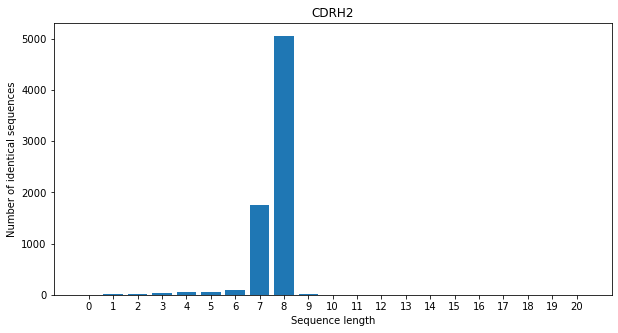

{0: 1, 1: 14, 2: 22, 3: 37, 4: 58, 5: 52, 6: 94, 7: 1753, 8: 5052, 9: 19, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
7102 sequences match out of 113526 and 218222 unique Abs and sdAbs sequences


In [40]:
h2_overlap_seqs, h2_overlap_seqs_dict = find_overlaps(abs_h2_clusters, sdabs_h2_clusters, 'CDRH2')

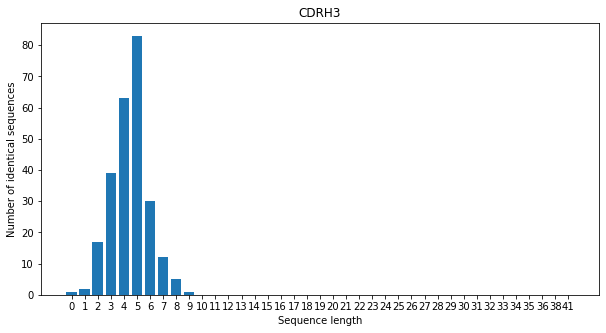

{0: 1, 1: 2, 2: 17, 3: 39, 4: 63, 5: 83, 6: 30, 7: 12, 8: 5, 9: 1, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 38: 0, 41: 0}
253 sequences match out of 372944 and 469579 unique Abs and sdAbs sequences


In [41]:
h3_overlap_seqs, h3_overlap_seqs_dict = find_overlaps(abs_h3_clusters, sdabs_h3_clusters, 'CDRH3')

### Expected overlap 

Use average loop lengths and sets of unique sequences to find probability of getting same sequence in both Abs and sdAbs

If taking a sequence from each set, formula for probability of those sequences being the same is 1/20^n (where n is the sequence length)

Therefore expected number of sequences that are the same is that probability multiplied by number of combinations (which is size of group A x size of group B)

In [71]:
def get_expected(num_abs_unique, num_sdabs_unique, avg_seq_length):

    expected = 1 / (20**avg_seq_length) #(num_abs_unique * num_sdabs_unique)
    print('Probability of choosing a sequence from each group and them being identical is: ', str(expected))
    combinations = num_abs_unique * num_sdabs_unique
    print('Therefore expected number of identical sequences you would find is ' + str(combinations * expected))
    return

Abs results:

In [72]:
# h1
get_expected(123491, 237743, 7.84)
# h2
get_expected(113526, 218222, 7.79)
# h3
get_expected(372944, 469579, 16.0)

Probability of choosing a sequence from each group and them being identical is:  6.30848150278314e-11
Therefore expected number of identical sequences you would find is 1.8521147058678598
Probability of choosing a sequence from each group and them being identical is:  7.327846000599054e-11
Therefore expected number of identical sequences you would find is 1.81539109855958
Probability of choosing a sequence from each group and them being identical is:  1.52587890625e-21
Therefore expected number of identical sequences you would find is 2.6722209255371096e-10
